In [32]:
import json
import os
import pickle

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import amrlib
from amrlib.alignments.faa_aligner import FAA_Aligner
import penman
import matplotlib.pyplot as plt

### Load data

In [33]:
filename = './qald_9.json'
with open(filename, 'r') as f:
    qald = json.load(f)

In [34]:
len(qald)

408

In [35]:
qald['train_1']

{'text': 'Who developed Skype?',
 'sparql': 'PREFIX dbo: <http://dbpedia.org/ontology/> PREFIX res: <http://dbpedia.org/resource/> PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> SELECT DISTINCT ?uri WHERE { res:Skype dbo:developer ?uri. }',
 'extended_amr': '(d / develop-02\n      :ARG0 (a / amr-unknown)\n      :ARG1 (p / product\n            :name (n / name\n                  :op1 "Skype"))\n\t:entities ( el / entity_list\n\t\t:entity (all0/ linked_entity\n\t\t\t\t:surface_form "Skype"\n\t\t\t\t:uri "http://dbpedia.org/resource/Skype")))\n',
 'relations': ['dbo:developer'],
 'id': 1}

In [36]:
print(qald['train_5']['extended_amr'])

(h / have-03
      :ARG0 (c / country
            :mod (a / amr-unknown))
      :ARG1 (p / place
            :ARG0-of (h2 / have-03
                  :ARG1 (c2 / cave
                        :quant (m / more-than
                              :op1 2))))
	:entities ( el / entity_list
		:entity (all0/ linked_entity
				:surface_form "country"
				:uri "http://dbpedia.org/ontology/Country")
		:entity (all1/ linked_entity
				:surface_form "cave"
				:uri "http://dbpedia.org/resource/Caves_of_Aggtelek_Karst_and_Slovak_Karst")))



In [37]:
from penman.models.amr import model
from penman.models import noop

In [38]:
penman.decode(qald['train_5']['extended_amr'], noop.NoOpModel())

<Graph object (top=h) at 139867226966768>

In [39]:
tree = penman.parse(qald['train_5']['extended_amr'], )
penman.interpret(tree, noop.NoOpModel()).triples

[('h', ':instance', 'have-03'),
 ('h', ':ARG0', 'c'),
 ('c', ':instance', 'country'),
 ('c', ':mod', 'a'),
 ('a', ':instance', 'amr-unknown'),
 ('h', ':ARG1', 'p'),
 ('p', ':instance', 'place'),
 ('p', ':ARG0-of', 'h2'),
 ('h2', ':instance', 'have-03'),
 ('h2', ':ARG1', 'c2'),
 ('c2', ':instance', 'cave'),
 ('c2', ':quant', 'm'),
 ('m', ':instance', 'more-than'),
 ('m', ':op1', '2'),
 ('h', ':entities', 'el'),
 ('el', ':instance', 'entity_list'),
 ('el', ':entity', 'all0'),
 ('all0', ':instance', 'linked_entity'),
 ('all0', ':surface_form', '"country"'),
 ('all0', ':uri', '"http://dbpedia.org/ontology/Country"'),
 ('el', ':entity', 'all1'),
 ('all1', ':instance', 'linked_entity'),
 ('all1', ':surface_form', '"cave"'),
 ('all1',
  ':uri',
  '"http://dbpedia.org/resource/Caves_of_Aggtelek_Karst_and_Slovak_Karst"')]

### Demo AMRLib models

In [40]:
# stog = amrlib.load_stog_model()
# gtos = amrlib.load_gtos_model()

# graphs = stog.parse_sents(['Who developed Skype?'])
# for graph in graphs:
#     print(graph)

# gtos.generate(graphs=[qald['train_1']['extended_amr']])

### Link surface forms to AMR nodes

In [41]:
os.environ['FABIN_DIR'] = '/home/iron-man/Documents/fast_align/build'
inference = FAA_Aligner()

In [42]:
example = 18
qald[f'train_{example}']['text']

'Who created the comic Captain America?'

#### Remove entity nodes

In [43]:
print(qald[f'train_{example}']['extended_amr'])

(c / create-01
      :ARG0 (a / amr-unknown)
      :ARG1 (c2 / comic
            :name (n / name
                  :op1 "Captain"
                  :op2 "America"))
	:entities ( el / entity_list
		:entity (all0/ linked_entity
				:surface_form "Captain America"
				:uri "http://dbpedia.org/resource/Captain_Comic")))



In [44]:
print(qald[f'train_{example}']['extended_amr'].split(':entities')[0].strip() + ')')

(c / create-01
      :ARG0 (a / amr-unknown)
      :ARG1 (c2 / comic
            :name (n / name
                  :op1 "Captain"
                  :op2 "America")))


In [45]:
# g_remove = penman.decode(qald[f'train_{example}']['extended_amr'])

# # traverse edge from top down
# # TODO: convert this into a BFS style traversal
# remove_nodes = []
# for edge in g_remove.edges():
#     src, role, tgt = edge
#     if src == g_remove.top and role == ':entities':
#         remove_nodes.append(tgt)
#         # recurse here?
#         for edge in g_remove.edges():
#             sub_src, sub_role, sub_tgt = edge
#             if sub_src == tgt:
#                 remove_nodes.append(sub_tgt)

# # filter out subgraph
# filtered_edges = []
# for edge in g_remove.edges():
#     src, role, tgt = edge
#     if (src not in remove_nodes) and (tgt not in remove_nodes):
#         filtered_edges.append(edge)

# filtered_attributes = []
# for edge in g_remove.attributes():
#     src, role, tgt = edge
#     if (src not in remove_nodes) and (tgt not in remove_nodes):
#         filtered_attributes.append(edge)

# filtered_instances = []
# for edge in g_remove.instances():
#     src, role, tgt = edge
#     if (src not in remove_nodes) and (tgt not in remove_nodes):
#         filtered_instances.append(edge)

# g_filt = penman.Graph(filtered_edges + filtered_attributes + filtered_instances)

# print(penman.encode(g_filt))

In [46]:
amr_filt = qald[f'train_{example}']['extended_amr'].split(':entities')[0].strip() + ')'
print(amr_filt)
print(qald[f'train_{example}']['extended_amr'])

(c / create-01
      :ARG0 (a / amr-unknown)
      :ARG1 (c2 / comic
            :name (n / name
                  :op1 "Captain"
                  :op2 "America")))
(c / create-01
      :ARG0 (a / amr-unknown)
      :ARG1 (c2 / comic
            :name (n / name
                  :op1 "Captain"
                  :op2 "America"))
	:entities ( el / entity_list
		:entity (all0/ linked_entity
				:surface_form "Captain America"
				:uri "http://dbpedia.org/resource/Captain_Comic")))



In [47]:
sents = [qald[f'train_{example}']['text'].lower()]
graph_strings = [amr_filt]

In [48]:
amr_surface_aligns, alignment_strings = inference.align_sents(sents, graph_strings)
print(alignment_strings)

['1-1 3-1.1 4-1.2.1.1 5-1.2.1.2 ']


In [49]:
qald[f'train_{example}']['text'].lower()

'who created the comic captain america?'

In [50]:
alignment_strings[0].split()

['1-1', '3-1.1', '4-1.2.1.1', '5-1.2.1.2']

In [51]:
print(penman.format(penman.parse(amr_surface_aligns[0])))

(c / create-01~e.1
   :arg0 (a / amr-unknown~e.3)
   :arg1 (c2 / comic
             :name (n / name
                      :op1 "captain"~e.4
                      :op2 "america"~e.5)))


### Identify entity nodes

- use linked entities in AMR graph to retrieve surface forms
- identify the token index position of these surface forms in the sentence
- use alignment strings to narrow in on a node in the graph
- TODO: determine how to use alignment string graph indexing
- retrieve entity nodes or perhaps more importantly, retrieve the parent node
- for example
```
:name (n / name
         :op1 "abraham"~e.2
         :op2 "lincoln"~e.3)
```

In [52]:
print(qald[f'train_{example}']['extended_amr'])

(c / create-01
      :ARG0 (a / amr-unknown)
      :ARG1 (c2 / comic
            :name (n / name
                  :op1 "Captain"
                  :op2 "America"))
	:entities ( el / entity_list
		:entity (all0/ linked_entity
				:surface_form "Captain America"
				:uri "http://dbpedia.org/resource/Captain_Comic")))



In [53]:
g = penman.decode(qald[f'train_{example}']['extended_amr'])
edge_list = []
for src, role, tgt in g.triples:
    if tgt.startswith('"'):
        tgt = eval(tgt)
    edge_list.append((src, tgt, {'role':role}))

di_g = nx.DiGraph()
di_g.add_edges_from(edge_list)

In [54]:
surface_forms = [v for u,v,e in di_g.edges(data=True) if e['role'] == ':surface_form']

In [55]:
surface_forms

['Captain America']

In [56]:
di_g

In [57]:
g.top

'c'

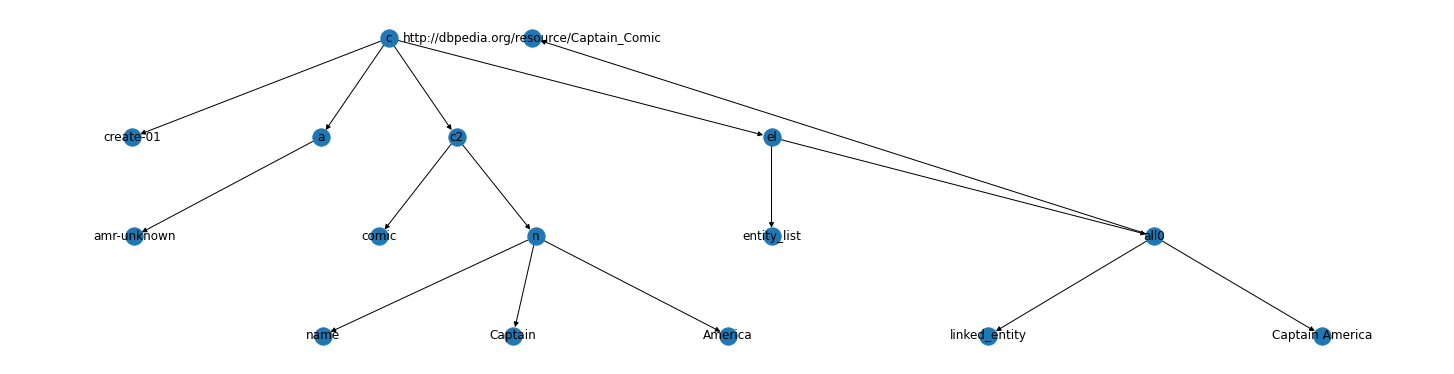

In [58]:
plt.figure(figsize=(20,5)) 
pos = graphviz_layout(di_g, prog="dot", root='d')
nx.draw(di_g, pos, with_labels=True, node_size=300)
plt.show()

In [59]:
# retrieve word idxs
word_idxs = []
for surface_form in surface_forms:
    # assuming surface_form only appears once in the text
    # TODO: handle cases where surface form doesn't appear in text (e.g typos, etc.)
    start_idx = qald[f'train_{example}']['text'].index(surface_form)
    end_idx = start_idx + len(surface_form)
    # remove everything after (and including) surface form
    pre_surface_form = qald[f'train_{example}']['text'][:start_idx]
    tokens_before = len(pre_surface_form.split())
    tokens_in_surface_form = [i + tokens_before for i in range(len(surface_form.split()))]
    word_idxs.append(tokens_in_surface_form)

In [27]:
word_idxs

[[2, 3]]

In [28]:
# use alignment strings to retrieve position in graph
alignments = {}
for mapping in alignment_strings[0].split():
    tok_idx, graph_idx = mapping.split('-')
    alignments[int(tok_idx)] = graph_idx

In [29]:
graph_idxs = []
for surface_form in word_idxs:
    surface_form_g_idxs = []
    for word_idx in surface_form:
        if word_idx in alignments:
            surface_form_g_idxs.append(alignments[word_idx])
    graph_idxs.append(surface_form_g_idxs)

In [30]:
# confirm that all tokens roll up to the same parent entity
list(zip(surface_forms, graph_idxs))

[('Abraham Lincoln', ['1.1.1.1', '1.1.1.2'])]

In [50]:
# BFS style traversal from root node to number nodes
class IndexBFS(object):
    def __init__(self, g, root):
        self.g = g
        self.root = root
        # index the nodes
        self.g.nodes[root]['index'] = '1'
        self.visited = set()
        self.frontier = [root]
    
    def bfs(self):
        while self.frontier:
            node = self.frontier.pop(0)
            if node in self.visited:
                continue
            else:
                self.visited.add(node)
            
            child_counter = 1
            for child in self.g.successors(node):
                # set index of children
                # no index required if edge type is instance
                if self.g[node][child]['role'] == ':instance':
                    self.g.nodes[child]['index'] = None
                    continue
                
                parent_index = self.g.nodes[node]['index']
                child_index = f'{parent_index}.{child_counter}'
                self.g.nodes[child]['index'] = child_index
                self.frontier.append(child)
                child_counter += 1
        return self.g

In [51]:
idx_bfs = IndexBFS(di_g, root='d')

result_g = idx_bfs.bfs()

In [53]:
result_g.nodes['Lincoln']

{'index': '1.1.1.2'}

In [54]:
print(qald[f'train_{example}']['extended_amr'])

(d / die-01
      :ARG1 (p / person
            :name (n / name
                  :op1 "Abraham"
                  :op2 "Lincoln"))
      :location (a / amr-unknown)
	:entities ( el / entity_list
		:entity (all0/ linked_entity
				:surface_form "Abraham Lincoln"
				:uri "http://dbpedia.org/resource/Abraham_Lincoln")))



In [58]:
# if node name is more than a single letter, then likely a name entity
# check if parent is name, and if so, retrieve the parent above name to treat as the entity node
entity_nodes = []
for entity_idxs in graph_idxs:
    parents = []
    for idx in entity_idxs:
        node = [x for x, y in result_g.nodes(data=True) if y['index'] == idx][0]
        parents.append(next(result_g.predecessors(node)))
    
    # assert they all share the same parent
    all_same = all(x == parents[0] for x in parents)
    assert all_same
    parent = parents[0]
    
    # if parent is an instance of a name
    if ('name' in result_g[parent]) and (result_g[parent]['name']['role'] == ':instance'):
        # then retrieve the parent of 'name' and treat that as an entity node
        grandparent = next(result_g.predecessors(parent))
        entity_nodes.append(grandparent)
    
    # TODO: if edge type is mod, retrieve parent to treat as the entity node

In [60]:
entity_nodes

['p']

### Implement Algorithm

In [61]:
g = penman.decode(qald[f'train_{example}']['extended_amr'])

In [62]:
g.top

'd'

In [63]:
g.instances()

[Instance(source='d', role=':instance', target='die-01'),
 Instance(source='p', role=':instance', target='person'),
 Instance(source='n', role=':instance', target='name'),
 Instance(source='a', role=':instance', target='amr-unknown'),
 Instance(source='el', role=':instance', target='entity_list'),
 Instance(source='all0', role=':instance', target='linked_entity')]

In [64]:
def is_imperative(g):
    imperative = False
    for source, edge_label, dest in g.triples:
        if edge_label == ':mode' and dest == 'imperative':
            imperative = True
    return imperative

In [67]:
def remove_source_node_edges(variable, g):
    """TODO: address children"""
    filtered_instances = []
    for instance in g.instances():
        src, role, tgt = instance
        if src != variable:
            filtered_instances.append(instance)
    
    filtered_edges = []
    for edge in g.edges():
        src, role, tgt = edge
        if (src != variable) and (target != variable):
            filtered_edges.append(edge)
    
    filtered_attributes = []
    for attr in g.attributes():
        src, role, tgt = attr
        if (src != variable) and (target != variable):
            filtered_attributes.append(attr)
            
    # create new graph
    g2 = penman.Graph(filtered_instances + filtered_edges + filtered_attributes)
    return g2

In [68]:
# AMR to triples
# Algorithm 1: https://arxiv.org/pdf/2012.01707.pdf
# idx = 0
text = qald[f'train_{example}']
# TODO: determine how to represent amr as a graph explicitly
amr = qald[f'train_{example}']['extended_amr']
query_nodes = set()
query_edges = set()

# if text is imperative
# check if :mode imperative in the edges
g = penman.decode(amr)
if is_imperative(g):
    # TODO: determine if we need to zoom in on the imperative predicate
    r = g.top
    # retrieve the ARG1 node from r
    # TODO: what to do if ARG1 is not present?
    arg1 = [tgt for src, role, tgt in g.edges() if role == ':ARG1'][0]
    # get idx for row where source == arg1 and set it as amr-unknown
    for idx, instance in enumerate(g.instances()):
        src, role, tgt = instance
        if src == arg1:
            break
    instances = g.instances()
    new_instance = penman.graph.Instance(source=src, role=role, target='amr-unknown')
    instances[idx] = new_instance
    # update the graph
    g = penman.graph.Graph(triples=g.edges()+instances+g.attributes())
    # delete r and it's edges
    g = remove_source_node_edges(r, g)

# TODO: are we assuming only one amr-unknown will be present?
# get node id for a
a = 'amr-unknown'
a_node_id = [src for src, role, tgt in g.instances() if (role == ':instance') and (tgt == a)][0]
# if there is a modifier edge
for src, role, tgt in g.edges() + g.attributes():
    if (src == a_node_id) and (role == ':mod'):
        a_node_id = tgt
        break
    elif (tgt == a_node_id) and (role == ':mod'):
        a_node_id = src
        break

In [69]:
print(amr)

(d / die-01
      :ARG1 (p / person
            :name (n / name
                  :op1 "Abraham"
                  :op2 "Lincoln"))
      :location (a / amr-unknown)
	:entities ( el / entity_list
		:entity (all0/ linked_entity
				:surface_form "Abraham Lincoln"
				:uri "http://dbpedia.org/resource/Abraham_Lincoln")))



In [70]:
G = nx.Graph()

edge_list = []
for src, role, tgt in g.edges():
    edge_list.append((src, tgt, {'role':role}))

G.add_edges_from(edge_list)

In [3]:
with open('/home/iron-man/Documents/data/amr-qa/probbank-dbpedia.pkl', 'rb') as f:
    mapping = pickle.load(f)

In [10]:
mapping['relation_scores']['use-01'][0]['rel']

'dbo:usedInWar'

In [74]:
prop_bank_predicates = set(list(mapping['relation_scores'].keys()))

In [75]:
entity_nodes

['p']

In [76]:
query_nodes = set()
query_edges = set()

for entity_node_id in entity_nodes:
    print(a_node_id, entity_node_id)
    amr_path = nx.shortest_path(G, a_node_id, entity_node_id)
    print(amr_path)

    collapsed_path = [a_node_id]
    source = a_node_id # n' in algo
    rel_builder = ''
    for idx, target in enumerate(amr_path[1:]):
        # get instance type of node
        node_type = [tgt for src, role, tgt in g.instances() if src == target][0]
        if node_type in prop_bank_predicates:
            rel = ''
            # get relation type
            for src, role, tgt in g.edges():
                if ((src == source) and (tgt == target)) or ((src == target) and (tgt == source)):
                    rel = role
                    break
            # ignore core roles such as ARG{0,...,n}
            if rel.startswith(':ARG'):
                rel = ''
            else:
                rel = rel[1:] + '|'
            
            # retrieve the second part of the relation exiting from target
            next_rel = ''
            next_node_on_path = amr_path[1:][idx+1]
            # get relation type
            for src, role, tgt in g.edges():
                if ((src == next_node_on_path) and (tgt == target)) or ((src == target) and (tgt == next_node_on_path)):
                    next_rel = role
                    break
            # ignore core roles such as ARG{0,...,n}
            if next_rel.startswith(':ARG'):
                next_rel = ''
            else:
                next_rel = '|' + next_rel[1:]
            
            # TODO: what does getRel do? Does it include the predicate itself?
            rel_builder = rel_builder + rel + node_type + next_rel
        # TODO: better understand def of A_c in algo 1
        else:
            collapsed_path.append(target)
            query_nodes.add(source)
            query_nodes.add(target) # not done in the paper
            # TODO: can we switch the order here?
            query_edges.add((target, rel_builder, source))
            source = target
            rel_builder = ''

a p
['a', 'd', 'p']


In [77]:
query_nodes

{'a', 'p'}

In [78]:
query_edges

{('p', 'location|die-01', 'a')}

In [79]:
# determine the query type
query_type = 'SELECT DISTINCT'
# TODO: implement logic for ASK queries
# TODO: implement logic for handling the target variable
# TODO: implement logic for sorting
# TODO: implement logic for counting

In [80]:
# TODO: translate entity nodes to entities
# TODO: implement data structure to map between nodes and entities
entity_nodes

['p']

In [82]:
# TODO: implement relation linking

In [83]:
grounded_edges = set()
grounded_edges.add(('a', 'dbo:deathPlace', 'http://dbpedia.org/resource/Abraham_Lincoln'))

In [84]:
clean_grounded_edges = set()
# replace prefixes
prefixes = {'http://dbpedia.org/ontology/': 'dbo:',
            'http://dbpedia.org/resource/': 'res:',
            'http://www.w3.org/2000/01/rdf-schema#': 'rdfs:'}
for element in grounded_edges:
    src, relation, tgt = element
    clean_src = f'?{src}'
    for prefix in prefixes:
        if src.startswith(prefix):
            clean_src = src.replace(prefix, prefixes[prefix])
            break
    
    clean_tgt = f'?{tgt}'
    for prefix in prefixes:
        if tgt.startswith(prefix):
            clean_tgt = tgt.replace(prefix, prefixes[prefix])
            break
    
    clean_grounded_edges.add((clean_src, relation, clean_tgt))

In [85]:
clean_grounded_edges

{('?a', 'dbo:deathPlace', 'res:Abraham_Lincoln')}

In [86]:
# generate the query
query_substrings = []
for prefix in prefixes:
    query_substrings.append(f'PREFIX {prefixes[prefix]} <{prefix}>')

query_substrings.append(query_type)

# get the variable
# TODO: what if there are 0 or more than 1 variables?
for element in clean_grounded_edges:
    src, relation, tgt = element
    if src.startswith('?'):
        variable = src
    elif tgt.startswith('?'):
        variable = tgt

query_substrings.append(variable)
query_substrings.append('WHERE')

# prepare triples
triples = ['{']
for element in clean_grounded_edges:
    src, relation, tgt = element
    triples.append(f'{src} {relation} {tgt}.')
triples.append('}')
query_substrings.extend(triples)

In [87]:
# TODO: how to handle all the possible 2^n possible orderings of triples
' '.join(query_substrings)

'PREFIX dbo: <http://dbpedia.org/ontology/> PREFIX res: <http://dbpedia.org/resource/> PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> SELECT DISTINCT ?a WHERE { ?a dbo:deathPlace res:Abraham_Lincoln. }'

In [88]:
print(qald[f'train_{example}']['sparql'])

PREFIX dbo: <http://dbpedia.org/ontology/> PREFIX res: <http://dbpedia.org/resource/> PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> SELECT DISTINCT ?uri WHERE { res:Abraham_Lincoln dbo:deathPlace ?uri. }
